## ASTR 597A Homework 3
Eric Bellm

Due Jan 24, 2023

Your name:
    
Your collaborators:

In [1]:
# Generic python packages
import numpy as np
import matplotlib.pyplot as plt

# LSST Science Pipelines (Stack) packages
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay
import lsst.sphgeom
afwDisplay.setDefaultBackend('matplotlib')

# Set a standard figure size to use
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
butler = dafButler.Butler('dp02', collections='2.2i/runs/DP0.2')
registry = butler.registry

## Exercise 1: Ask the Butler

The 04b (Intermediate Butler Queries) tutorial notebooks may be helpful.

### Exercise 1a

How many DP0.2 tracts have r-band `'deepCoadd'`s?

In [3]:
# for dt in sorted(registry.queryDatasetTypes()):
#     print(dt)

In [4]:
dt_deepCoadd = registry.getDatasetType('deepCoadd')
print(dt_deepCoadd)

DatasetType('deepCoadd', {band, skymap, tract, patch}, ExposureF)


In [5]:
import pandas as pd

In [6]:
datasetType = 'deepCoadd'
dataId = {'band': 'r'}
datasetRefs = registry.queryDatasets(datasetType, dataId=dataId)

df = pd.DataFrame([ref.dataId for ref in datasetRefs])
df

,band,skymap,tract,patch
0,r,DC2,3085,17
1,r,DC2,3086,12
2,r,DC2,3084,10
3,r,DC2,3084,32
4,r,DC2,3084,12
...,...,...,...,...
7688,r,DC2,5063,38
7689,r,DC2,5062,40
7690,r,DC2,5063,31
7691,r,DC2,5064,20


In [7]:
len(df['tract'].unique())

157

### Exercise 1b

Find the tract and patch corresponding to (ra, dec) 62.0, -37.0.  If there is more than one r-band `deepCoad` at that position, make a plot that explains why.

In [43]:
my_ra_deg = 62
my_dec_deg = -37
my_filter = 'r'

my_spherePoint = lsst.geom.SpherePoint(my_ra_deg*lsst.geom.degrees, my_dec_deg*lsst.geom.degrees)

skymap = butler.get('skyMap')
tract = skymap.findTract(my_spherePoint)
my_tract = tract.tract_id
my_patch = tract.findPatch(my_spherePoint).getSequentialIndex()
print('My tract and patch: ', my_tract, my_patch)

My tract and patch:  3831 10


In [31]:
level = 23  # the resolution of the HTM grid
pixelization = lsst.sphgeom.HtmPixelization(level)

ra, dec = 62, -37
htm_id = pixelization.index(
    lsst.sphgeom.UnitVector3d(
        lsst.sphgeom.LonLat.fromDegrees(ra, dec)
    )
)

In [32]:
circle = pixelization.triangle(htm_id).getBoundingCircle()
scale = circle.getOpeningAngle().asDegrees()*3600.
level = pixelization.getLevel()
print(f'HTM ID={htm_id} at level={level} is bounded by a circle of radius ~{scale:0.2f} arcsec.')

HTM ID=617345737139805 at level=23 is bounded by a circle of radius ~0.04 arcsec.


In [34]:
datasetRefs = registry.queryDatasets("deepCoadd", htm20=htm_id, dataId=dataId)

for i, ref in enumerate(datasetRefs):
    print(ref)
    if i > 6:
        print('...')
        break

print(f"Found {len(list(datasetRefs))} deepCoadd")

deepCoadd@{band: 'r', skymap: 'DC2', tract: 3831, patch: 3}, sc=ExposureF] (id=4b0c49ef-36ab-4377-b3a9-62cd8ca60e46)
deepCoadd@{band: 'r', skymap: 'DC2', tract: 3831, patch: 10}, sc=ExposureF] (id=76cc103b-03ce-4d32-9829-4ba650271878)
Found 2 deepCoadd


In [36]:
datasetRefs

<DatasetRef iterator for [components of] deepCoadd>

In [49]:
coadds = [butler.get(ref) for ref in datasetRefs]

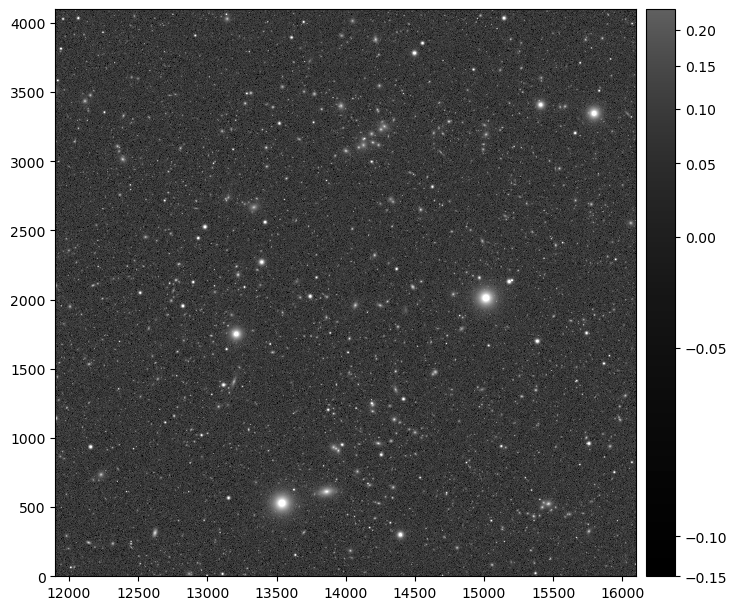

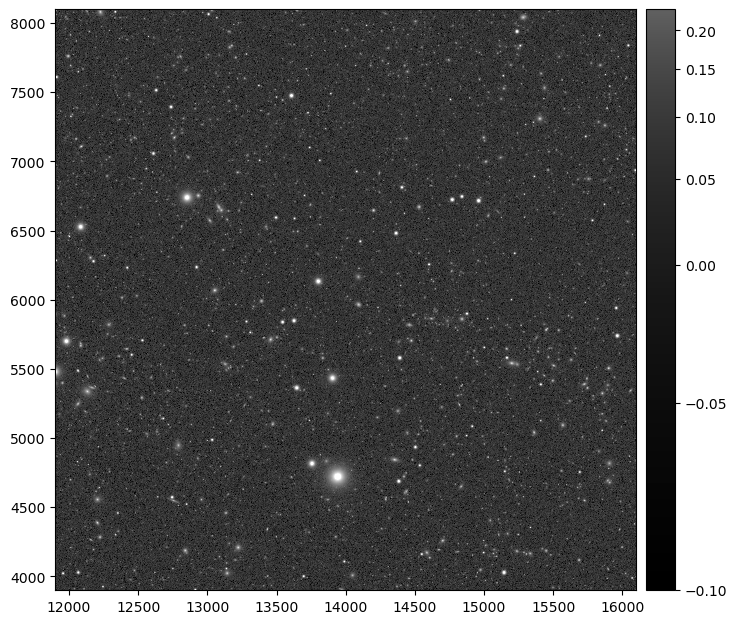

In [41]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(coadds[0].image)
plt.show() 
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(coadds[1].image)
plt.show()

### Exercise 1c

Using the (tract, patch) with the lowest patch number, plot histograms of the seeing values of the images that were coadded in the r-band `deepCoadd` and `goodSeeingCoadd` for that (tract, patch).  Tutorial notebook 09a (Custom Coadd)will give you some ideas on how to get the `coaddInputs`.  The `coaddInputs.ccds` table will be helpful.

For each input `calexp`, you will need to retrieve the PSF and then use `psf.computeShape(psf.getAveragePosition()).getDeterminantRadius()` to get the PSF width in sigma.  Convert these to FWHM in arcseconds for your plots.

In [52]:
coadds[0]

In [50]:
# Retrieve inputs

my_deepCoadd_inputs = coadds[0].getInfo().getCoaddInputs()

In [68]:
my_deepCoadd_inputs.ccds.asAstropy()

id,bbox_min_x,bbox_min_y,bbox_max_x,bbox_max_y,ccd,visit,goodpix,weight,filter
,pix,pix,pix,pix,,,,,
int64,int32,int32,int32,int32,int32,int64,int32,float64,str32
638889000,0,0,4071,3999,0,638889,1841683,12.037010079931436,r_sim_1.4
638889003,0,0,4071,3999,3,638889,6005486,12.037010079931436,r_sim_1.4
942566000,0,0,4071,3999,0,942566,1784800,4.654985597953264,r_sim_1.4
942566001,0,0,4071,3999,1,942566,5499872,4.654985597953264,r_sim_1.4
942566003,0,0,4071,3999,3,942566,1590548,4.654985597953264,r_sim_1.4
942566004,0,0,4071,3999,4,942566,6530650,4.654985597953264,r_sim_1.4
202618001,0,0,4071,3999,1,202618,638614,13.651131895891792,r_sim_1.4
202618002,0,0,4071,3999,2,202618,2396467,13.651131895891792,r_sim_1.4


In [61]:
inputs = registry.queryDatasets('deepCoadd.coaddInputs', dataId={'band': 'r', 'skymap': 'DC2', 'tract': 3831, 'patch': 3})

In [63]:
coaddInputs = []
for inp in inputs:
    coaddInputs.append(butler.get(inp))

In [66]:
coaddInputs[0].ccds.asAstropy()

id,bbox_min_x,bbox_min_y,bbox_max_x,bbox_max_y,ccd,visit,goodpix,weight,filter
,pix,pix,pix,pix,,,,,
int64,int32,int32,int32,int32,int32,int64,int32,float64,str32
638889000,0,0,4071,3999,0,638889,1841683,12.037010079931436,r_sim_1.4
638889003,0,0,4071,3999,3,638889,6005486,12.037010079931436,r_sim_1.4
942566000,0,0,4071,3999,0,942566,1784800,4.654985597953264,r_sim_1.4
942566001,0,0,4071,3999,1,942566,5499872,4.654985597953264,r_sim_1.4
942566003,0,0,4071,3999,3,942566,1590548,4.654985597953264,r_sim_1.4
942566004,0,0,4071,3999,4,942566,6530650,4.654985597953264,r_sim_1.4
202618001,0,0,4071,3999,1,202618,638614,13.651131895891792,r_sim_1.4
202618002,0,0,4071,3999,2,202618,2396467,13.651131895891792,r_sim_1.4


## Exercise 2: DIY Good-seeing Coadd

Complete the `09a_Custom_Coadd` tutorial notebook, but rather than coadding all of the visits within a temporal window, instead coadd the three first three visits that have seeing values in the range included in the `goodSeeingCoadd` inputs.  Display the result and compare to the standard `deepCoadd` and `goodSeeingCoadd`.

Coadded template images are a necessary input to alert production.  What are the implications of this exercise for alert generation early in the LSST survey?  How many images were taken before three images had good enough seeing?  How long did the survey run before the images were acquired?